In [1]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントとmecabをインストール
system("apt-get install -y fonts-ipafont mecab libmecab-dev mecab-ipadic mecab-ipadic-utf8")
# フォント一覧を表示
# systemfonts::system_fonts()
install.packages("RMeCab", repos="http://rmecab.jp/R/")
install.packages(c("wordcloud"), dependencies=TRUE)
library(RMeCab)
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘BH’, ‘Rcpp’, ‘tm’, ‘slam’




###下のコードの簡潔な説明
関数getMorphでデータフレームを取得し、4行目以降に各テキストファイルのデータ列があるのでそれらの数値を合計し、既存のFREQ列に代入する。その後freqの降順に並び替え、datを用いてワードクラウドを作成する。

In [3]:
system("apt -y install zip && unzip NE2022.zip")    # フォルダ解凍

In [4]:
getMorph <- function(fn, pos) {
  dat <- docDF(fn, type = 1, pos = pos)
  names(dat)[4] <- "FREQ" # 列名の4番目を"FREQ"に変更
  ne <- grep("[[:punct:]]+", dat$TERM)      # dat$TERM中のパンクチュエーションの位置（行番号）
  dat <- dat[-ne,]      # neの行削除　※neが空（要素数0）だとエラーになるので注意

  # (4) アルファベット1文字削除
  ne <- grep("^([[:upper:]]|[[:lower:]])$", dat$TERM)
  if(length(ne)!=0)dat <- dat[-ne,]
  # (2,3,5) 数・接尾・非自立を削除
  ne <- which(dat$POS2 %in% c("数", "非自立", "接尾"))
  dat <- dat[-ne,]
  return(dat)
}

# [1]
library('RMeCab')
library('wordcloud')

fn <- "NE2022"     # フォルダ
pos <- c("名詞","形容詞","動詞")
dat <- getMorph(fn, pos)
# dat
FREQ <- apply(dat[,4:ncol(dat)],1,sum)     # 「datの4列以降の部分」を「行方向」に「合計」
dat <- cbind(dat[,1:3],FREQ)      # 「datの1〜3列の部分」と「FREQ」を列方向に結合
head(dat); tail(dat)    # 最初と最後を確認

id <- order(dat$FREQ, decreasing = TRUE)	# datのFREQ列の値を降順にする行番号の並べ替え
dat <- dat[id[1:150],]  # 頻度の上位150要素

file_name =  NE2022/32000.txt opened
file_name =  NE2022/32002.txt opened
file_name =  NE2022/32024.txt opened
file_name =  NE2022/32028.txt opened
file_name =  NE2022/32032.txt opened
file_name =  NE2022/32036.txt opened
file_name =  NE2022/32040.txt opened
file_name =  NE2022/32052.txt opened
file_name =  NE2022/32056.txt opened
file_name =  NE2022/32076.txt opened
file_name =  NE2022/32080.txt opened
file_name =  NE2022/32082.txt opened
file_name =  NE2022/32140.txt opened
file_name =  NE2022/32144.txt opened
file_name =  NE2022/32146.txt opened
file_name =  NE2022/32152.txt opened
file_name =  NE2022/32162.txt opened
file_name =  NE2022/32166.txt opened
file_name =  NE2022/32170.txt opened
file_name =  NE2022/32172.txt opened
file_name =  NE2022/32174.txt opened
file_name =  NE2022/32176.txt opened
file_name =  NE2022/32178.txt opened
file_name =  NE2022/32180.txt opened
file_name =  NE2022/32182.txt opened
file_name =  NE2022/32184.txt opened
file_name =  NE2022/32186.txt opened
f

,TERM,POS1,POS2,FREQ
,<chr>,<chr>,<chr>,<int>
146,AD,名詞,一般,1
147,AI,名詞,一般,10
148,AI,名詞,固有名詞,11
149,ALCNetAcademyNEXT,名詞,一般,1
150,API,名詞,一般,1
151,API,名詞,固有名詞,1


,TERM,POS1,POS2,FREQ
,<chr>,<chr>,<chr>,<int>
4837,ＩＴ,名詞,固有名詞,2
4838,ＮＣ,名詞,固有名詞,6
4839,ＰＢＬ,名詞,一般,2
4840,ＰＢＬ,名詞,固有名詞,6
4841,ＲＥＩＴ,名詞,固有名詞,1
4842,ＵＭＬ,名詞,一般,1


Warning message in wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(10, 1), :
“する could not be fit on page. It will not be plotted.”


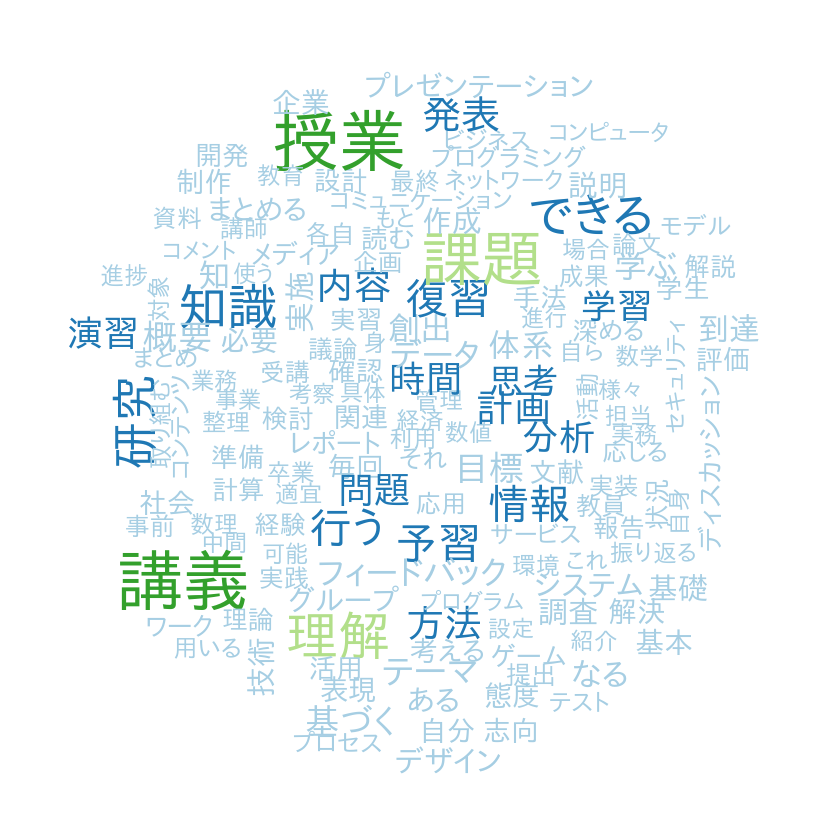

In [5]:
# [2] Word Cloudの図
# 自分で記述してください．
wordcloud(dat$TERM, dat$FREQ, min.freq = 3, scale = c(10, 1), colors = brewer.pal(12, "Paired"))